In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading training data from a csv file

In [2]:
train_data = pd.read_csv('train_loan.csv')

# Checking dataset information

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Checking for missing values

In [8]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# Here we can see few categorical and numerical columns are having missing values.
# Next step will be handling these missing data using python 

# Handling missing data 

# 1. Plot a histogram to check the skeness of numerical data columns

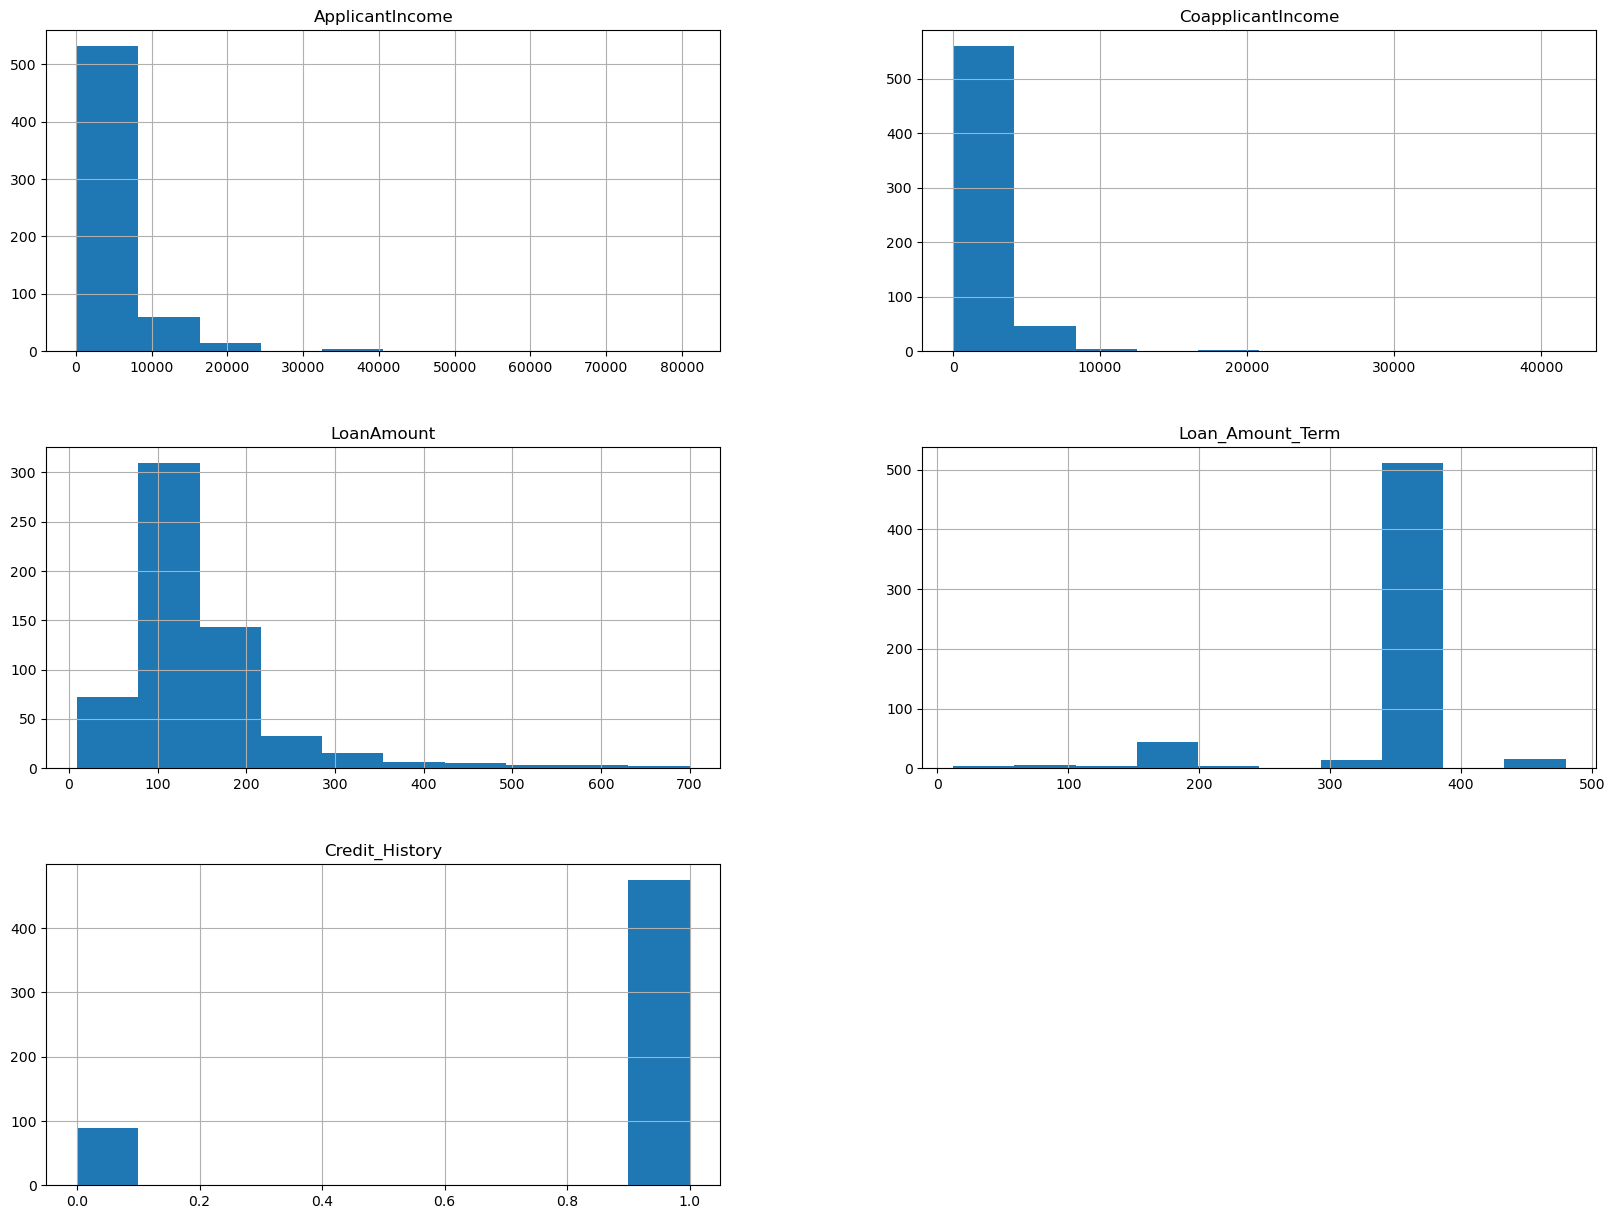

In [10]:
plot_num_columns = train_data.select_dtypes(include = ['float', 'int'])
plot_num_columns.hist(figsize=(20, 15))
plt.show()

# Filling missing values

In [11]:
# Here we can see in the histogram the data are right skewed, so we can use the median to file the data.

In [12]:
num_colums = ['LoanAmount','Loan_Amount_Term', 'Credit_History']

In [13]:
for col in num_colums:
    train_data[col] = train_data[col].fillna(train_data[col].median())

# Verifying the dataset after handling missing data

In [14]:
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# 2. Handling missing values in categorical data

In [15]:
train_data[train_data['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [16]:
# Compute the mode
mode_value = train_data['Gender'].mode()[0]
mode_value

'Male'

In [17]:
# Fill the missing values with mode
train_data['Gender'].fillna(mode_value, inplace=True)

In [18]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
train_data[train_data['Married'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y


In [20]:
# Compute the mode
mode_value = train_data['Married'].mode()[0]
mode_value

'Yes'

In [21]:
# Fill the missing values with mode
train_data['Married'].fillna(mode_value, inplace=True)

In [22]:
# Compute the mode
mode_value = train_data['Self_Employed'].mode()[0]
mode_value

'No'

In [23]:
# Fill the missing values with mode
train_data['Self_Employed'].fillna(mode_value, inplace=True)

In [24]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [25]:
# replacing 3+ with 3
train_data['Dependents'] = train_data['Dependents'].replace('3+', '3')

In [26]:
# converting the column to numeric type
train_data['Dependents']=pd.to_numeric(train_data['Dependents'], errors='coerce')

In [27]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [28]:
train_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
train_data[train_data['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
104,LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,360.0,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [31]:
df = pd.DataFrame(train_data['Dependents'])

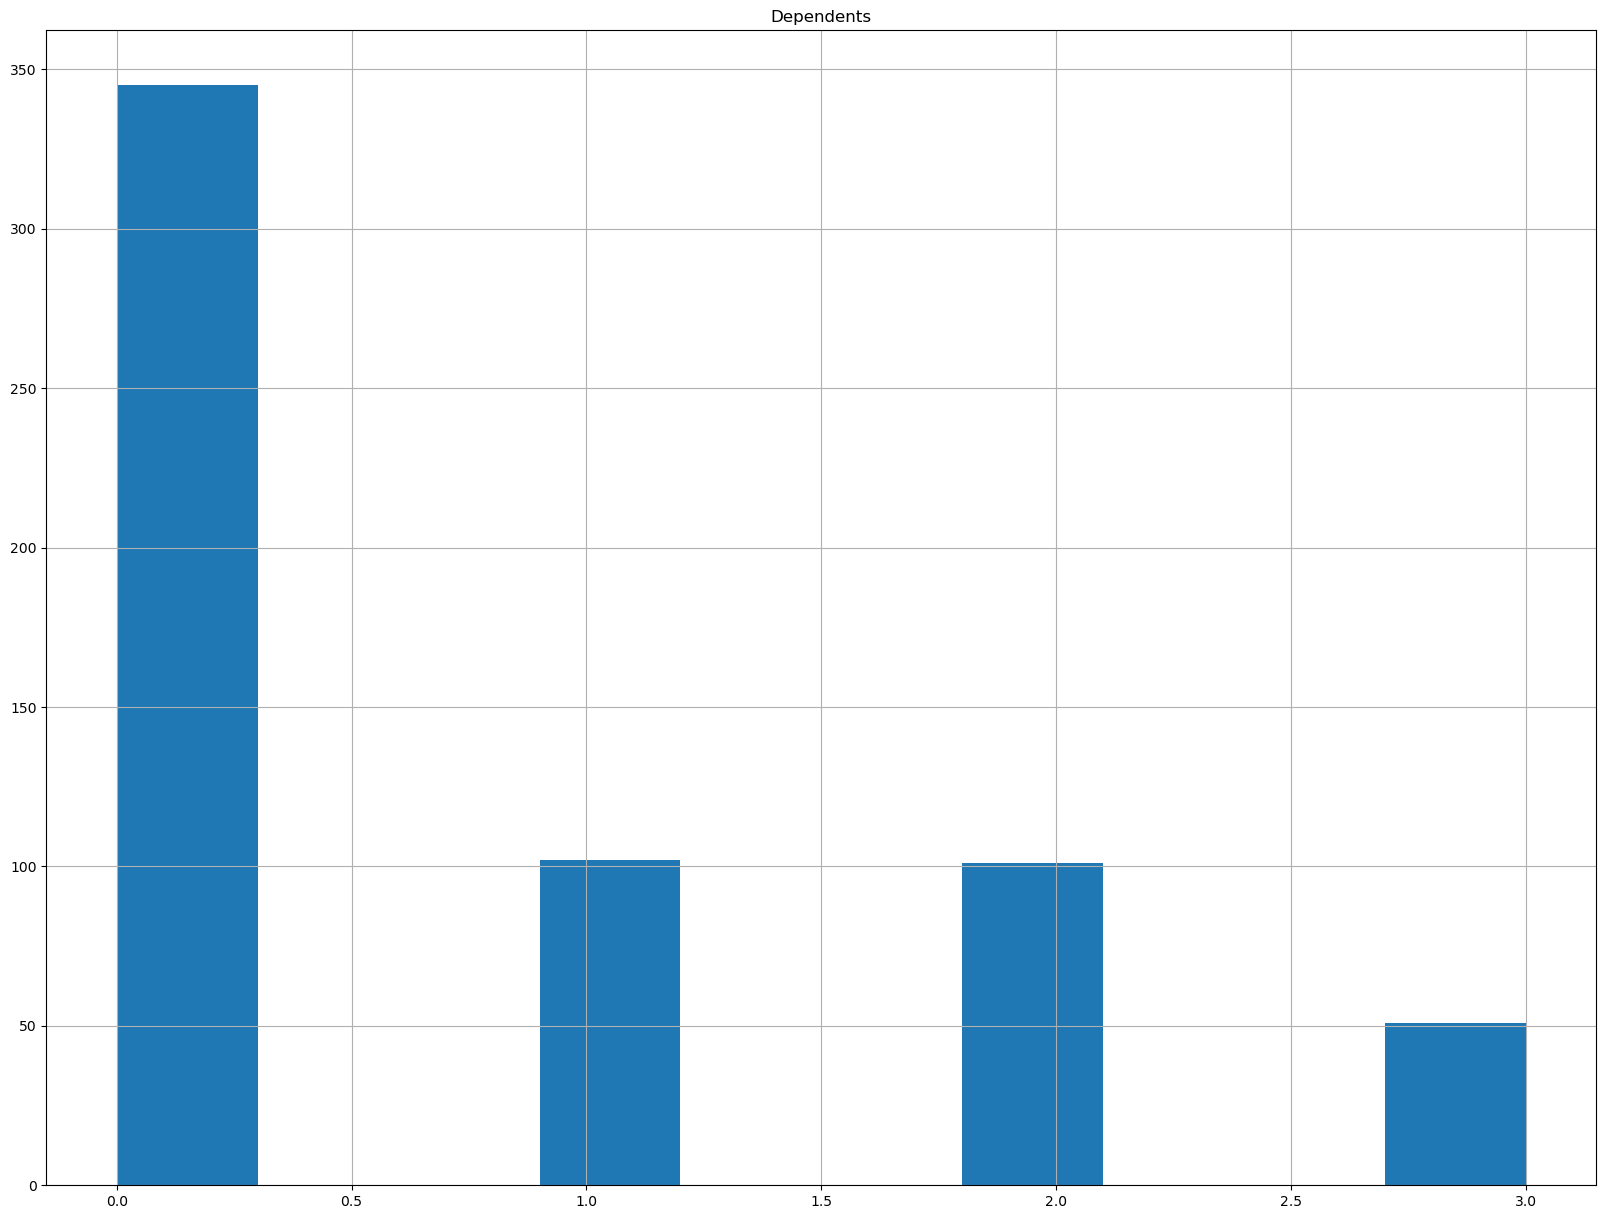

In [32]:
# Plot histogram of Dependents column
df.hist(figsize=(20, 15))
plt.show()

In [33]:
train_data['Dependents'] = train_data['Dependents'].fillna(train_data['Dependents'].median())

In [34]:
train_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Finding outliers using box plot

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

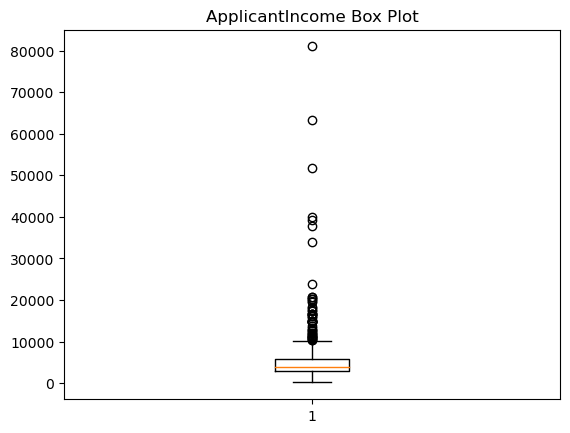

In [35]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

In [36]:
Q1 = np.percentile(train_data['ApplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['ApplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['ApplicantIncome'], 75, method = 'midpoint')

In [37]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  2879.0
Q2 :  3812.5
Q3 :  5790.0


In [38]:
IQR = Q3 - Q1

In [39]:
low_limit = Q1 - 1.5 * IQR

In [40]:
up_limit = Q3 + 1.5 * IQR

In [41]:
print('Lower Limit : ', low_limit)

Lower Limit :  -1487.5


In [42]:
print('Upper Limit :', up_limit)

Upper Limit : 10156.5


In [43]:
outlier = []
for x in train_data['ApplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [44]:
outlier

[12841,
 12500,
 11500,
 10750,
 13650,
 11417,
 14583,
 10408,
 23803,
 10513,
 20166,
 14999,
 11757,
 14866,
 39999,
 51763,
 33846,
 39147,
 12000,
 11000,
 16250,
 14683,
 11146,
 14583,
 20667,
 20233,
 15000,
 63337,
 19730,
 15759,
 81000,
 14880,
 12876,
 10416,
 37719,
 16692,
 16525,
 16667,
 10833,
 18333,
 17263,
 20833,
 13262,
 17500,
 11250,
 18165,
 19484,
 16666,
 16120,
 12000]

# Finding the index of outlier data

In [45]:
ind1 = train_data['ApplicantIncome'] > up_limit

In [46]:
train_data.loc[ind1].index

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')

# Droping outlier data

In [47]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'ApplicantIncome Box Plot')

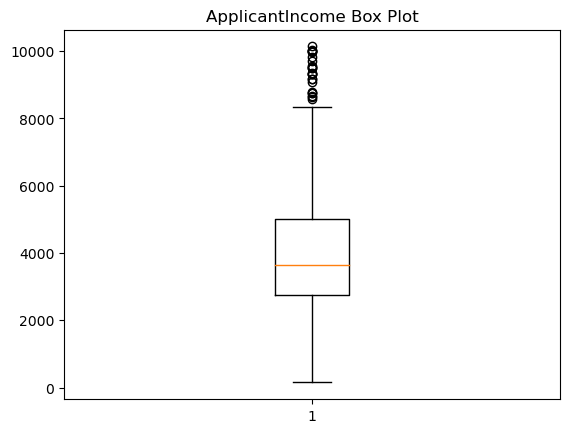

In [48]:
plt.boxplot(train_data['ApplicantIncome'])
plt.title('ApplicantIncome Box Plot')

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

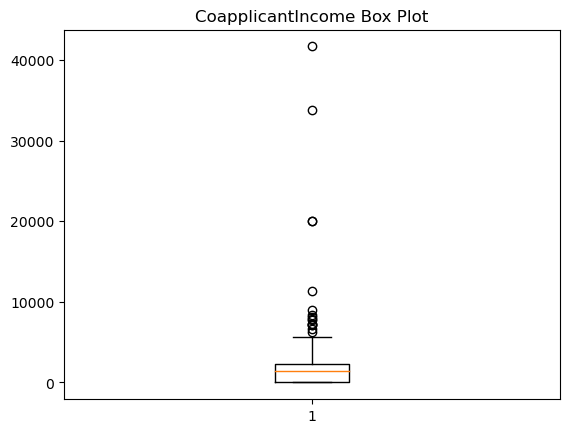

In [49]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

In [50]:
Q1 = np.percentile(train_data['CoapplicantIncome'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['CoapplicantIncome'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['CoapplicantIncome'], 75, method = 'midpoint')
    

In [51]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  0.0
Q2 :  1405.5
Q3 :  2338.0


In [52]:
IQR = Q3 - Q1

In [53]:
low_limit = Q1 - 1.5 * IQR

In [54]:
up_limit = Q3 + 1.5 * IQR

In [55]:
print('Lower Limit : ', low_limit)

Lower Limit :  -3507.0


In [56]:
print('Upper Limit :', up_limit)

Upper Limit : 5845.0


In [57]:
outlier = []
for x in train_data['CoapplicantIncome']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [58]:
outlier

[8106.0,
 7210.0,
 8980.0,
 7750.0,
 11300.0,
 7250.0,
 7101.0,
 6250.0,
 7873.0,
 20000.0,
 20000.0,
 8333.0,
 6666.0,
 7166.0,
 33837.0,
 41667.0]

In [59]:
ind1 = train_data['CoapplicantIncome'] > up_limit

In [60]:
train_data.loc[ind1].index

Int64Index([12, 38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444, 513, 523,
            581, 600],
           dtype='int64')

In [61]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'CoapplicantIncome Box Plot')

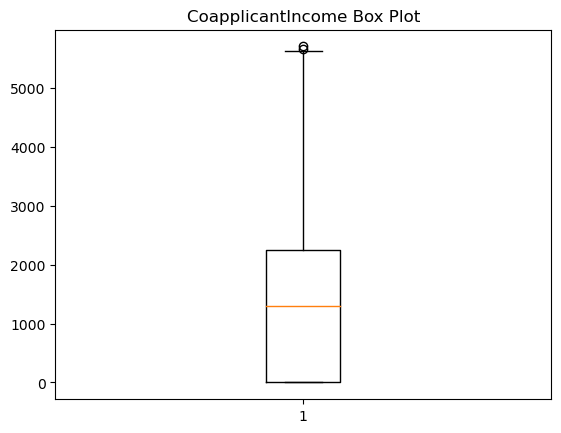

In [62]:
plt.boxplot(train_data['CoapplicantIncome'])
plt.title('CoapplicantIncome Box Plot')

Text(0.5, 1.0, 'LoanAmount Box Plot')

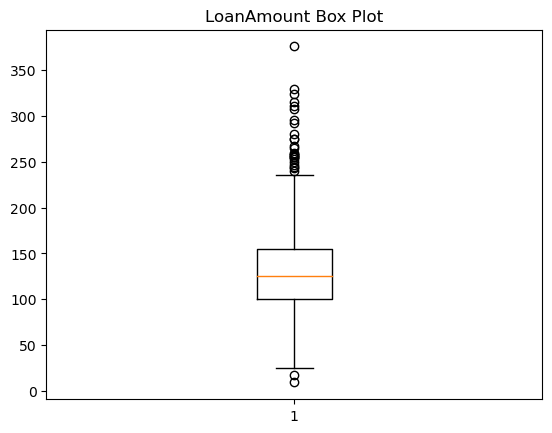

In [63]:
plt.boxplot(train_data['LoanAmount'])
plt.title('LoanAmount Box Plot')

Text(0.5, 1.0, 'Loan_Amount_Term Box Plot')

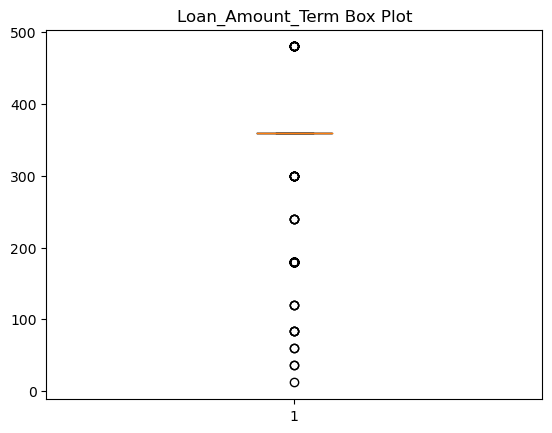

In [64]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Box Plot')

In [65]:
Q1 = np.percentile(train_data['Loan_Amount_Term'], 25, method = 'midpoint')
Q2 = np.percentile(train_data['Loan_Amount_Term'], 50, method = 'midpoint')
Q3 = np.percentile(train_data['Loan_Amount_Term'], 75, method = 'midpoint')

In [66]:
print('Q1 : ', Q1)
print('Q2 : ', Q2)
print('Q3 : ', Q3)

Q1 :  360.0
Q2 :  360.0
Q3 :  360.0


In [67]:
IQR = Q3 - Q1

In [68]:
low_limit = Q1 - 1.5 * IQR

In [69]:
up_limit = Q3 + 1.5 * IQR

In [70]:
print('Lower Limit : ', low_limit)

Lower Limit :  360.0


In [71]:
print('Upper Limit :', up_limit)

Upper Limit : 360.0


In [72]:
outlier = []
for x in train_data['Loan_Amount_Term']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)

In [73]:
outlier

[120.0,
 240.0,
 180.0,
 180.0,
 60.0,
 300.0,
 480.0,
 300.0,
 240.0,
 180.0,
 120.0,
 180.0,
 180.0,
 480.0,
 120.0,
 180.0,
 180.0,
 480.0,
 180.0,
 480.0,
 180.0,
 300.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 60.0,
 180.0,
 180.0,
 480.0,
 36.0,
 180.0,
 300.0,
 480.0,
 480.0,
 84.0,
 180.0,
 180.0,
 180.0,
 480.0,
 300.0,
 480.0,
 180.0,
 180.0,
 480.0,
 180.0,
 180.0,
 180.0,
 300.0,
 300.0,
 180.0,
 240.0,
 300.0,
 180.0,
 180.0,
 180.0,
 180.0,
 300.0,
 84.0,
 12.0,
 480.0,
 300.0,
 480.0,
 180.0,
 180.0,
 36.0,
 180.0,
 480.0,
 84.0,
 84.0,
 180.0,
 240.0,
 180.0,
 180.0,
 180.0]

In [74]:
ind1 = train_data['Loan_Amount_Term'] > up_limit

In [75]:
train_data.loc[ind1].index

Int64Index([75, 109, 168, 179, 228, 248, 293, 298, 358, 366, 378, 500, 516,
            573],
           dtype='int64')

In [76]:
train_data.drop(train_data.loc[ind1].index, inplace = True)

Text(0.5, 1.0, 'Loan_Amount_Term Box Plot')

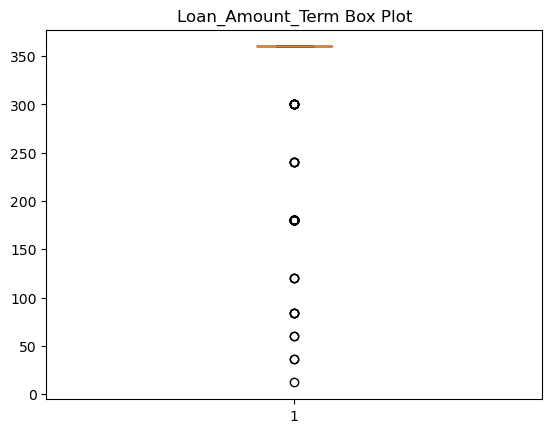

In [77]:
plt.boxplot(train_data['Loan_Amount_Term'])
plt.title('Loan_Amount_Term Box Plot')

Text(0.5, 1.0, 'Credit_History Box Plot')

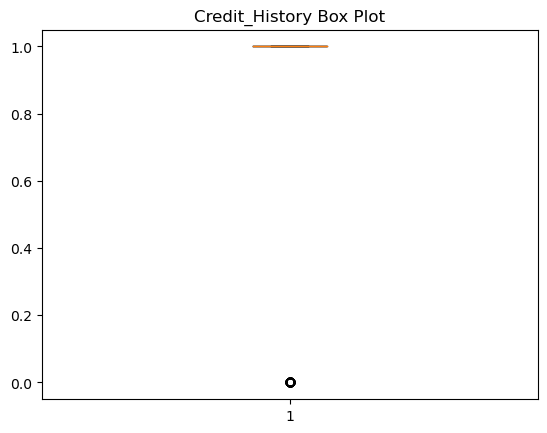

In [78]:
plt.boxplot(train_data['Credit_History'])
plt.title('Credit_History Box Plot')

In [79]:
train_data.shape

(534, 13)

# Encoding categorical column

In [80]:

train_data['Loan_Status'] = train_data.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)


In [81]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [82]:

train_data = train_data.replace({"Gender":{"Male":1, "Female":0 }})

In [83]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [84]:

train_data =train_data.replace({"Married" :{"Yes":1, "No":0}})

In [85]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [86]:
train_data['Education'].value_counts()

Graduate        407
Not Graduate    127
Name: Education, dtype: int64

In [87]:
train_data= train_data.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

In [88]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,1,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,1,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [89]:
train_data['Self_Employed'].value_counts()

No     470
Yes     64
Name: Self_Employed, dtype: int64

In [90]:
train_data= train_data.replace({"Self_Employed":{"Yes":1, "No":0 }})

In [91]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [92]:
train_data['Property_Area'] = train_data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [93]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [94]:
train_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,1,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,1,1
613,LP002990,0,0,0.0,1,1,4583,0.0,133.0,360.0,0.0,2,0


In [95]:
train_data = train_data.drop(columns=['Loan_ID'])

In [96]:
train_data.shape

(534, 12)

# Scaling the dataset

In [97]:
from sklearn import preprocessing

In [98]:
train_data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.818352,0.655431,0.724719,0.762172,0.119850,4151.426966,1366.610337,130.876404,339.438202,0.859551,1.074906,0.702247
std,0.385916,0.475673,0.997684,0.426152,0.325091,1912.081852,1465.295189,51.915248,61.604431,0.347779,0.822986,0.457699
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2790.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3667.000000,1293.500000,126.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5031.500000,2252.250000,155.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.000000,376.000000,360.000000,1.000000,2.000000,1.000000


In [99]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [100]:
train_data = min_max.fit_transform(train_data)

In [101]:
train_data = pd.DataFrame(train_data)
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,0.818352,0.655431,0.241573,0.762172,0.119850,0.400583,0.239714,0.332088,0.940914,0.859551,0.537453,0.702247
std,0.385916,0.475673,0.332561,0.426152,0.325091,0.191419,0.257024,0.141458,0.177024,0.347779,0.411493,0.457699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,0.264291,0.000000,0.247956,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,0.352087,0.226890,0.318801,1.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,0.333333,1.000000,0.000000,0.488688,0.395062,0.397820,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Pre-Processing test dataset

In [102]:
test_data = pd.read_csv('test_loan.csv')

In [103]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [104]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [105]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [106]:

test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data['Credit_History'].median())

In [107]:
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [108]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [109]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [110]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

# Handling  missing value

In [111]:
test_data[test_data['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
22,LP001128,NaN,No,0,Graduate,No,3909,0,101.0,360.0,1.0,Urban
51,LP001287,NaN,Yes,3+,Not Graduate,No,3500,833,120.0,360.0,1.0,Semiurban
106,LP001563,NaN,No,0,Graduate,No,1596,1760,119.0,360.0,0.0,Urban
138,LP001769,NaN,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
209,LP002165,NaN,No,1,Not Graduate,No,2038,4027,100.0,360.0,1.0,Rural
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
245,LP002355,NaN,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.0,Semiurban
279,LP002553,NaN,No,0,Graduate,No,29167,0,185.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban
303,LP002657,NaN,Yes,1,Not Graduate,Yes,570,2125,68.0,360.0,1.0,Rural


In [112]:
# Compute the mode
mode_value = test_data['Gender'].mode()[0]

In [113]:
mode_value

'Male'

In [114]:
# Fill the missing values with mode
test_data['Gender'].fillna(mode_value, inplace=True)

In [115]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [116]:
test_data['Dependents'] = test_data['Dependents'].replace('3+', '3')


In [117]:
test_data['Dependents']= pd.to_numeric(test_data['Dependents'], errors='coerce')

In [118]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0.0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [119]:
test_data[test_data['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
46,LP001237,Male,Yes,NaN,Not Graduate,No,4163,1475,162.0,360.0,1.0,Urban
70,LP001366,Female,No,NaN,Graduate,No,3250,0,95.0,360.0,1.0,Semiurban
111,LP001587,Male,Yes,NaN,Graduate,No,4082,0,93.0,360.0,1.0,Semiurban
138,LP001769,Male,No,NaN,Graduate,No,3333,1250,110.0,360.0,1.0,Semiurban
202,LP002111,Male,Yes,NaN,Graduate,No,3016,1300,100.0,360.0,1.0,Urban
247,LP002360,Male,Yes,NaN,Graduate,No,10000,0,NaN,360.0,1.0,Urban
251,LP002385,Male,Yes,NaN,Graduate,No,3863,0,70.0,300.0,1.0,Semiurban
265,LP002441,Male,No,NaN,Graduate,No,3579,3308,138.0,360.0,1.0,Semiurban
302,LP002654,Female,No,NaN,Graduate,Yes,14987,0,177.0,360.0,1.0,Rural
312,LP002754,Male,No,NaN,Graduate,No,2066,2108,104.0,84.0,1.0,Urban


In [120]:
test_data.shape

(367, 12)

In [121]:
test_data = test_data.dropna(subset=['Dependents'])

In [122]:
test_data.shape

(357, 12)

In [123]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            4
Loan_Amount_Term      6
Credit_History        0
Property_Area         0
dtype: int64

In [124]:
test_data[test_data['Self_Employed'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,Male,Yes,2.0,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
11,LP001082,Male,Yes,1.0,Graduate,NaN,2185,1516,162.0,360.0,1.0,Semiurban
13,LP001094,Male,Yes,2.0,Graduate,NaN,12173,0,166.0,360.0,0.0,Semiurban
36,LP001208,Male,Yes,2.0,Graduate,NaN,7350,4029,185.0,180.0,1.0,Urban
72,LP001375,Male,Yes,1.0,Graduate,NaN,4083,1775,139.0,60.0,1.0,Urban
89,LP001472,Female,No,0.0,Graduate,NaN,5058,0,200.0,360.0,1.0,Rural
142,LP001789,Male,Yes,3.0,Not Graduate,NaN,6794,528,139.0,360.0,0.0,Urban
161,LP001906,Male,No,0.0,Graduate,NaN,2964,0,84.0,360.0,0.0,Semiurban
168,LP001950,Female,Yes,3.0,Graduate,NaN,1750,2935,94.0,360.0,0.0,Semiurban
175,LP001999,Male,Yes,2.0,Graduate,NaN,4912,4614,160.0,360.0,1.0,Rural


In [125]:
# Compute the mode
mode_value = test_data['Self_Employed'].mode()[0]

In [126]:
mode_value

'No'

In [127]:
# Fill the missing values with mode
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(mode_value)

In [128]:
test_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           4
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [129]:
test_data[test_data['LoanAmount'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
78,LP001415,Male,Yes,1.0,Graduate,No,3413,4053,NaN,360.0,1.0,Semiurban
101,LP001542,Female,Yes,0.0,Graduate,No,2262,0,NaN,480.0,0.0,Semiurban
188,LP002057,Male,Yes,0.0,Not Graduate,No,13083,0,NaN,360.0,1.0,Rural
289,LP002593,Male,Yes,1.0,Graduate,No,8333,4000,NaN,360.0,1.0,Urban


In [130]:
test_data[test_data['Loan_Amount_Term'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
45,LP001232,Male,Yes,0.0,Graduate,No,4260,3900,185.0,NaN,1.0,Urban
48,LP001268,Male,No,0.0,Graduate,No,6792,3338,187.0,NaN,1.0,Urban
117,LP001611,Male,Yes,1.0,Graduate,No,1516,2900,80.0,NaN,0.0,Rural
129,LP001695,Male,Yes,1.0,Not Graduate,No,3321,2088,70.0,NaN,1.0,Semiurban
184,LP002045,Male,Yes,3.0,Graduate,No,10166,750,150.0,NaN,1.0,Urban
214,LP002183,Male,Yes,0.0,Not Graduate,No,3754,3719,118.0,NaN,1.0,Rural


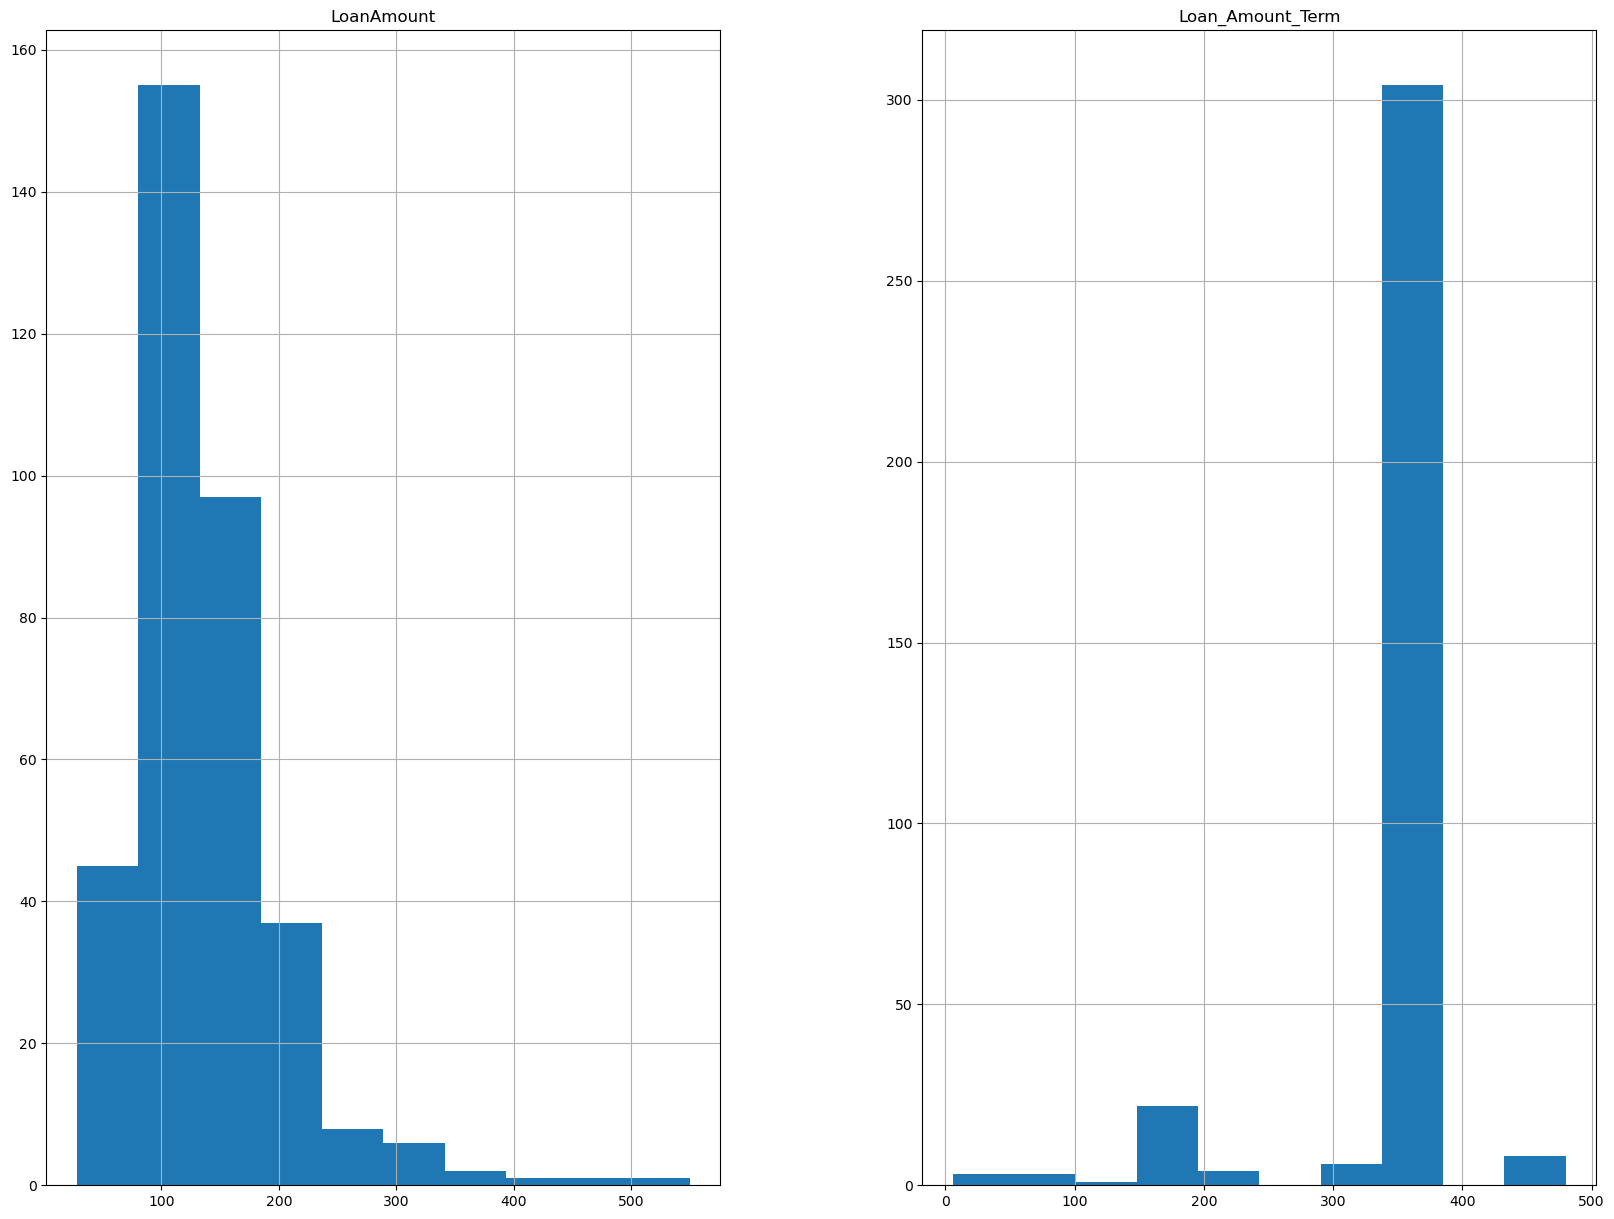

In [131]:
test_data[['LoanAmount', 'Loan_Amount_Term']].hist(figsize=(20, 15))
plt.show()

In [132]:
# drop the rows 
test_data = test_data.dropna(subset=['LoanAmount', 'Loan_Amount_Term'])

In [133]:
test_data.shape

(347, 12)

In [134]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [135]:
test_data = test_data.replace({"Gender":{"Male":1, "Female":0 }})

In [136]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [137]:
test_data =test_data.replace({"Married" :{"Yes":1, "No":0}})

In [138]:
test_data['Education'].value_counts()


Graduate        267
Not Graduate     80
Name: Education, dtype: int64

In [139]:
test_data= test_data.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

In [140]:
test_data['Self_Employed'].value_counts()

No     311
Yes     36
Name: Self_Employed, dtype: int64

In [141]:
test_data= test_data.replace({"Self_Employed":{"Yes":1, "No":0 }})

In [142]:
test_data['Self_Employed'].value_counts()

0    311
1     36
Name: Self_Employed, dtype: int64

In [143]:
test_data['Property_Area'].value_counts()

Urban        132
Semiurban    108
Rural        107
Name: Property_Area, dtype: int64

In [144]:
test_data['Property_Area'] = test_data['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [145]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0.0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1.0,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2.0,1,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2.0,1,0,2340,2546,100.0,360.0,1.0,1
4,LP001051,1,0,0.0,0,0,3276,0,78.0,360.0,1.0,1


In [146]:
test_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,1,1,3.0,0,1,4009,1777,113.0,360.0,1.0,1
363,LP002975,1,1,0.0,1,0,4158,709,115.0,360.0,1.0,1
364,LP002980,1,0,0.0,1,0,3250,1993,126.0,360.0,1.0,2
365,LP002986,1,1,0.0,1,0,5000,2393,158.0,360.0,1.0,0
366,LP002989,1,0,0.0,1,1,9200,0,98.0,180.0,1.0,0
